# Machine Learning for the Detection of Network Attacks

Part II Computer Science, Univeristy of Cambridge 

I will perform, and analyse the following 5 machine learning algorithms on the [CICIDS 2017 Dataset](https://www.unb.ca/cic/datasets/ids-2017.html): 

- Support Vector Machine (SVM)
- Decision Tree
- Naive Bayes
- K Means Clustering 
- K Nearest Neighbours

First, I will prepare the dataset, making sure it is the right shape and there are no null values. Next I will perform feature selection, using a filter approach. Lastly, I will then train and test the different models.

[1]: Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Portugal, January 2018

# Imports

In [1]:
# import required libraries 
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split

# Reading in Data

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. They have been executed both morning and afternoon on Tuesday, Wednesday, Thursday and Friday.

Day, Date, Description, Size (GB)

- Monday, Normal Activity, 11.0G
- Tuesday, attacks + Normal Activity, 11G
- Wednesday, attacks + Normal Activity, 13G
- Thursday, attacks + Normal Activity, 7.8G
- Friday, attacks + Normal Activity, 8.3G

They have split the csv into 8 different files (for the different days), so need to combine these. 

In [2]:
# path to where ML files are stored
path = 'MachineLearningCVE'
all_files = glob.glob(path + "/*.csv")

# concatenate the 8 files into 1
dataset = pd.concat((pd.read_csv(f) for f in all_files))

Column names from the dataset

In [3]:
col_names = ["Destination_Port",
             "Protocol",
             "Timestamp",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

Inspect the Dataset

In [4]:
# Assign the column names
dataset.columns = col_names
# Peak at first 5 records in the dataset
dataset.drop(columns=['Timestamp'],axis=1,inplace=True)
dataset.head(5)

,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [5]:
# get statistics about each feature
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination_Port,1048575.0,7.392499e+03,1.753869e+04,0.0,53.0,80.0,445.0,6.553400e+04
Protocol,1048575.0,9.518465e+00,5.303721e+00,0.0,6.0,6.0,17.0,1.700000e+01
Flow_Duration,1048575.0,1.430739e+07,3.335503e+07,0.0,413.0,36896.0,3377079.0,1.200000e+08
Total_Fwd_Packets,1048575.0,5.145998e+00,3.379921e+01,1.0,1.0,2.0,5.0,9.021000e+03
Total_Backward_Packets,1048575.0,6.419784e+00,9.786280e+01,0.0,1.0,1.0,4.0,1.918100e+04
...,...,...,...,...,...,...,...,...
Active_Min,1048575.0,8.320523e+04,8.678863e+05,0.0,0.0,0.0,0.0,1.119924e+08
Idle_Mean,1048575.0,4.347475e+06,1.422425e+07,0.0,0.0,0.0,0.0,1.199915e+08
Idle_Std,1048575.0,2.658500e+05,2.349741e+06,0.0,0.0,0.0,0.0,7.251285e+07
Idle_Max,1048575.0,4.616676e+06,1.486555e+07,0.0,0.0,0.0,0.0,1.199915e+08


In [6]:
# check all the values are numerical
# if not, would have to encode
dataset.dtypes

Destination_Port            int64
Protocol                    int64
Flow_Duration               int64
Total_Fwd_Packets           int64
Total_Backward_Packets      int64
                           ...   
Idle_Mean                 float64
Idle_Std                  float64
Idle_Max                    int64
Idle_Min                    int64
Label                      object
Length: 79, dtype: object

Flow_Bytes_s, Flow_Packets_s are of type object, the rest apart from attack are numeric. However, the data inside these are numeric so will convert them. 
Also, they have Fwd_Header_Length twice so drop the second occurence.

In [7]:
dataset['Flow_Bytes_s'] = dataset['Flow_Bytes_s'].astype('float64')
dataset['Flow_Packets_s'] = dataset['Flow_Packets_s'].astype('float64')
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

### Remove NaN/Null/Inf Values

In [8]:
# check if there are any Null values
dataset.isnull().any().any()

True

In [9]:
# Replace Inf values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
dataset = dataset.dropna()
# Double check these are all gone
dataset.isnull().any().any()

False

### Explore Attacks in Dataset

In [10]:
# Distribution of Dataset
dataset['Label'].value_counts()

Benign                   988050
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

In [11]:
plt.figure(figsize=(15,10))

'''attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
'''
attack=('DoS GoldenEye','DoS Slowloris')
y_pos = np.arange(len(attack))
amount = dataset['Label'].value_counts()[1:]

<Figure size 1080x720 with 0 Axes>

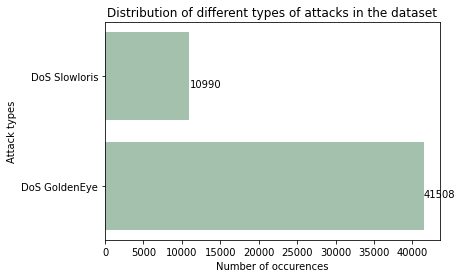

In [12]:
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

There are only 11, 21, and 36 instances of Heartbleed, SQL injection and infiltration respectively. So, we will drop these since there will not be sufficient trianing data. 
In addition, rename the web attacks to remove the unicode ?

In [13]:
dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

Benign                   988050
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: Label, dtype: int64

In [14]:
dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'XSS'

We will add a binary attack column - indicating a 0 if benign, or 1 if there was an attack. 

Furthermore, since there are several types of attacks, I propose a grouping of attacks, which should lead to a better accuracy and generalisation. 

In [15]:
# Create attack column, containing binary labels
dataset['Attack'] = np.where(dataset['Label'] == 'Benign', 0, 1)

In [16]:
# Proposed Groupings
attack_group = {'Benign': 'benign',
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS attacks-GoldenEye': 'dos',
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS attacks-Slowloris': 'dos',
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}
# Create grouped label column
dataset['Label_Category'] = dataset['Label'].map(lambda x: attack_group[x])
dataset['Label_Category'].value_counts()

benign    988050
dos        52498
Name: Label_Category, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

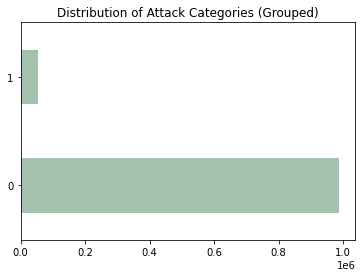

In [17]:
train_attacks = dataset['Attack'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

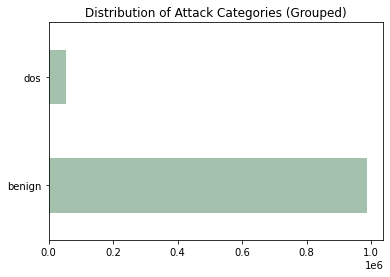

In [18]:
train_attacks = dataset['Label_Category'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories')

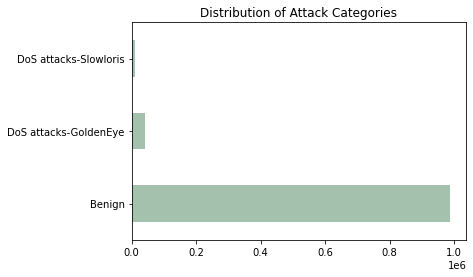

In [19]:
train_attacks = dataset['Label'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Distribution of Attack Categories')

# Split Data

Split data using 60:20:20 ratio, for training, test and validation dataset. We stratify such that the proportions of attacks remain the same throughout the 3 sets. 

In [20]:
# 3 Different labeling options
attacks = ['Label', 'Label_Category', 'Attack']

# xs=feature vectors, ys=labels
xs = dataset.drop(attacks, axis=1)
ys = dataset[attacks]

# split dataset - stratified
x_train, x_temp, y_train, y_temp = train_test_split(xs, ys, test_size=0.4, random_state=0, stratify=ys['Label'])
x_test, x_validate, y_test, y_validate = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp['Label'])

In [21]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'CWE_Flag_Count',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

Drop these because they only contain one value, and so are redundant as columns

In [22]:
x_train = x_train.drop(to_drop, axis=1)
x_validate = x_validate.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = dataset.drop(to_drop, axis=1)

## Apply Normalisation
Using minmax normalisation

In [23]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_validate = min_max_scaler.transform(x_validate)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
pd.Series(x_train.flatten()).describe()

count    4.245430e+07
mean     4.918172e-02
std      1.726940e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.050000e-06
75%      2.419943e-03
max      1.000000e+00
dtype: float64

## Feature Selection
Use chi2 select k best
First, score all the features

In [24]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train.Label)

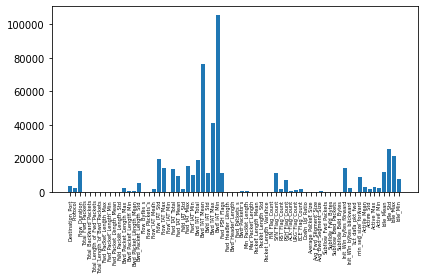

In [25]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.drop(['Label', 'Label_Category', 'Attack'],axis=1).columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.png', dpi=300)

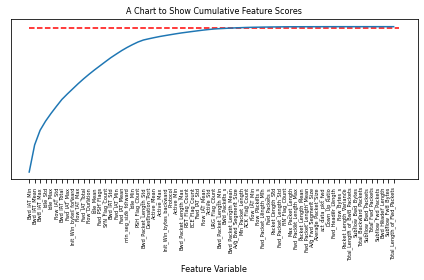

In [26]:
# sort the features by importance score
feature_importances = zip(dataset_copy.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features.png', dpi=300)

We select 40 features. 99% of the information is contained in the first 40, so this is the cut off point

In [27]:
# perform selectkbest with k=40
features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.Label)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)
x_validate = fit.transform(x_validate)

Need to find out what are the new features that we need to collect

In [28]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [29]:
new_features

Index(['Destination_Port', 'Protocol', 'Flow_Duration',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total',
       'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
       'Fwd_PSH_Flags', 'Bwd_Packets_s', 'Min_Packet_Length', 'SYN_Flag_Count',
       'RST_Flag_Count', 'PSH_Flag_Count', 'URG_Flag_Count', 'ECE_Flag_Count',
       'Avg_Bwd_Segment_Size', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'min_seg_size_forward', 'Active_Mean',
       'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std',
       'Idle_Max', 'Idle_Min'],
      dtype='object')

In [30]:
'''attack = np.array(['Benign', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])'''
attack = np.array(['Benign','DoS GoldenEye', 'DoS slowloris'])
attack_groups = np.array(['benign', 'dos'])

## 1. SVM 

Try our first algorithm - a support vector machine
    1. On all labels
    2. On grouped labels
    3. On binary labels

In [31]:
classifier = LinearSVC()

### All labels

In [32]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_svm_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_svm_1

12.507397890090942 0.031909942626953125


col_0,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris
Label,,,
Benign,197482,36,93
DoS attacks-GoldenEye,0,8291,10
DoS attacks-Slowloris,52,0,2146


In [33]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999737,0.999347,0.999542
1,DoS GoldenEye,0.995677,0.998795,0.997234
2,DoS slowloris,0.954202,0.976342,0.965145


In [34]:
precision_svm_1, recall_svm_1, fscore_svm_1, support = score(y_validate.Label, y_predicted, average='macro')
accuracy_svm_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped labels

In [35]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_svm_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_svm_2

5.992609977722168 0.01900482177734375


col_0,benign,dos
Label_Category,,
benign,197509,102
dos,52,10447


In [36]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)

d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999737,0.999484,0.999610
1,dos,0.990331,0.995047,0.992683


In [37]:
precision_svm_2, recall_svm_2, fscore_svm_2, n = score(y_validate.Label_Category, y_predicted, average='macro')
accuracy_svm_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [38]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)
confusion_svm_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_svm_3

6.319951772689819 0.021941661834716797


col_0,0,1
Attack,,
0,197509,102
1,52,10447


In [39]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999737,0.999484,0.999610
1,1,0.990331,0.995047,0.992683


In [40]:
precision_svm_3, recall_svm_3, fscore_svm_3, n = score(y_validate.Attack, y_predicted, average='macro')
accuracy_svm_3 = accuracy_score(y_validate.Attack, y_predicted)

### Results for SVM:

In [41]:
print('Support Vector Machine: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_svm_1, recall_svm_1, fscore_svm_1,  accuracy_svm_1)
print('Groupued Labels:', precision_svm_2, recall_svm_2, fscore_svm_2, accuracy_svm_2)
print('Binary Labels:', precision_svm_3, recall_svm_3, fscore_svm_3, accuracy_svm_3)

Support Vector Machine: Precision / Recall / Fscore / Accuracy
All Labels: 0.9832051119928543 0.9914948858015263 0.9873068546038356 0.9990822161356975
Groupued Labels: 0.9950338136010587 0.9972654908746488 0.9961468433109641 0.9992600067272116
Binary Labels: 0.9950338136010587 0.9972654908746488 0.9961468433109641 0.9992600067272116


## 2. Decision Tree

In [42]:
classifier = DecisionTreeClassifier(random_state = 0)

### All labels

In [43]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_dt_1

4.938085079193115 0.03706526756286621


col_0,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris
Label,,,
Benign,197611,0,0
DoS attacks-GoldenEye,2,8289,10
DoS attacks-Slowloris,0,7,2191


In [44]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999990,1.000000,0.999995
1,DoS GoldenEye,0.999156,0.998554,0.998855
2,DoS slowloris,0.995457,0.996815,0.996135


In [45]:
precision_dt_1, recall_dt_1, fscore_dt_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_dt_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped Labels

In [46]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_dt_2

4.3753767013549805 0.036900997161865234


col_0,benign,dos
Label_Category,,
benign,197611,0
dos,0,10499


In [47]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)

d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,1.0,1.0,1.0
1,dos,1.0,1.0,1.0


In [48]:
precision_dt_2, recall_dt_2, fscore_dt_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_dt_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [49]:
# fit the model
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict validation
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_dt_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_dt_3

3.5933938026428223 0.0359039306640625


col_0,0,1
Attack,,
0,197611,0
1,0,10499


In [50]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,1.0,1.0,1.0
1,1,1.0,1.0,1.0


In [51]:
precision_dt_3, recall_dt_3, fscore_dt_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_dt_3 = accuracy_score(y_validate.Attack, y_predicted)

### Decision tree results

In [52]:
print('Decision Tree: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_dt_1, recall_dt_1, fscore_dt_1, accuracy_dt_1)
print('Groupued Labels:', precision_dt_2, recall_dt_2, fscore_dt_2, accuracy_dt_2)
print('Binary Labels:', precision_dt_3, recall_dt_3, fscore_dt_3, accuracy_dt_3)

Decision Tree: Precision / Recall / Fscore / Accuracy
All Labels: 0.9982009032349594 0.998456559220476 0.9983285465713333 0.999908702128682
Groupued Labels: 1.0 1.0 1.0 1.0
Binary Labels: 1.0 1.0 1.0 1.0


## 3. Naive Bayes

In [53]:
classifier = MultinomialNB()

### Original labels

In [54]:
# fit model
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_nb_1

3.2254014015197754 0.03160429000854492


col_0,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris
Label,,,
Benign,193907,1,3703
DoS attacks-GoldenEye,8118,0,183
DoS attacks-Slowloris,710,0,1488


In [55]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.956455,0.981256,0.968697
1,DoS GoldenEye,0.000000,0.000000,0.000000
2,DoS slowloris,0.276889,0.676979,0.393027


In [56]:
precision_nb_1, recall_nb_1, fscore_nb_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_nb_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped labels

In [57]:
# fit model
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_nb_2

2.213067054748535 0.028922557830810547


col_0,benign,dos
Label_Category,,
benign,190849,6762
dos,8810,1689


In [58]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.955875,0.965781,0.960802
1,dos,0.199858,0.160872,0.178259


In [59]:
precision_nb_2, recall_nb_2, fscore_nb_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_nb_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [60]:
# fit model
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_nb_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_nb_3

0.1496272087097168 0.027926206588745117


col_0,0,1
Attack,,
0,190849,6762
1,8810,1689


In [61]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.955875,0.965781,0.960802
1,1,0.199858,0.160872,0.178259


In [62]:
precision_nb_3, recall_nb_3, fscore_nb_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_nb_3 = accuracy_score(y_validate.Attack, y_predicted)

### Naive Bayes Results

In [63]:
print('Naive Bayes: Precision / Recall / Fscore / Accuracy')
print('All labels:', precision_nb_1, recall_nb_1, fscore_nb_1, accuracy_nb_1)
print('Grouped labels:', precision_nb_2, recall_nb_2, fscore_nb_2, accuracy_nb_2)
print('Binary labels:', precision_nb_3, recall_nb_3, fscore_nb_3, accuracy_nb_3)

Naive Bayes: Precision / Recall / Fscore / Accuracy
All labels: 0.4111147316372193 0.5527450586825907 0.4539080061304288 0.9389025034837346
Grouped labels: 0.5778663857233345 0.5633268605802242 0.5695305260513824 0.9251741867281726
Binary labels: 0.5778663857233345 0.5633268605802242 0.5695305260513824 0.9251741867281726


# 4. K Nearest Neighbours 

Find what the value of K is best 

In [64]:
p_list = []
r_list = []
f1_list = []

# for odd values of k, 1-50 (note: takes a long time to run)
# k_range = range(1, 51, 2)
k_range = range(1, 5, 2)
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # fit model
    classifier.fit(x_train, y_train.Label)
    # predict validation
    y_predicted = classifier.predict(x_validate)
    # calculate metrics
    precision, recall, fscore, n = score(y_validate.Label, y_predicted, average = 'macro')
    # append to the list
    p_list.append(precision)
    r_list.append(recall)
    f1_list.append(fscore)

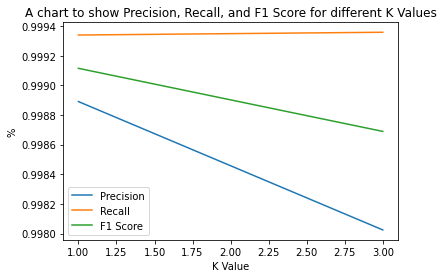

In [65]:
# plot results 
plt.plot(k_range, p_list, label='Precision')
plt.plot(k_range, r_list, label='Recall')

plt.plot(k_range, f1_list, label='F1 Score')
plt.legend(loc='best')
plt.xlabel('K Value')
plt.ylabel('%')
plt.title('A chart to show Precision, Recall, and F1 Score for different K Values')
plt.savefig('knn_k_values.png')

### All labels with k=7

In [66]:
# fit model
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

#predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

#calculate metrics
precision_knn_1, recall_knn_1, fscore_knn_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_knn_1=  accuracy_score(y_validate.Label, y_predicted)

confusion_knn_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_knn_1

566.892370223999 368.99797463417053


col_0,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris
Label,,,
Benign,197606,3,2
DoS attacks-GoldenEye,2,8289,10
DoS attacks-Slowloris,0,0,2198


In [67]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999990,0.999975,0.999982
1,DoS GoldenEye,0.999638,0.998554,0.999096
2,DoS slowloris,0.994570,1.000000,0.997278


### grouped labels, k=7

In [68]:
# fit model
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# metrics
precision_knn_2, recall_knn_2, fscore_knn_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_knn_2 =  accuracy_score(y_validate.Label_Category, y_predicted)

confusion_knn_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_knn_2

549.5742001533508 368.87889432907104


col_0,benign,dos
Label_Category,,
benign,197606,5
dos,2,10497


In [69]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999990,0.999975,0.999982
1,dos,0.999524,0.999810,0.999667


### binary labels, k=7

In [70]:
# fit model
classifier = KNeighborsClassifier(n_neighbors = 7)
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# metrics
precision_knn_3, recall_knn_3, fscore_knn_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_knn_3 =  accuracy_score(y_validate.Attack, y_predicted)

confusion_knn_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_knn_3

542.9528770446777 369.5938448905945


col_0,0,1
Attack,,
0,197606,5
1,2,10497


In [71]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999990,0.999975,0.999982
1,1,0.999524,0.999810,0.999667


### KNN Results

In [72]:
print('KNN: Precision / Recall / Fscore / Accuracy')
print('All Labels:', precision_knn_1, recall_knn_1, fscore_knn_1, accuracy_knn_1)
print('Groupued Labels:', precision_knn_2, recall_knn_2, fscore_knn_2, accuracy_knn_2)
print('Binary Labels:', precision_knn_3, recall_knn_3, fscore_knn_3, accuracy_knn_3)

KNN: Precision / Recall / Fscore / Accuracy
All Labels: 0.998066073399384 0.9995096962673417 0.9987853231970315 0.999918312430926
Groupued Labels: 0.9997568895808765 0.9998921017160034 0.9998244854199217 0.999966363942146
Binary Labels: 0.9997568895808765 0.9998921017160034 0.9998244854199217 0.999966363942146


## 5. K Means Cluster

In [73]:
colors = ['gray', 'turquoise', 'yellow', 'red', 
          'purple', 'black', 'blue', 'green',
         'orangered', 'pink', 'cyan', 'maroon']

### All labels


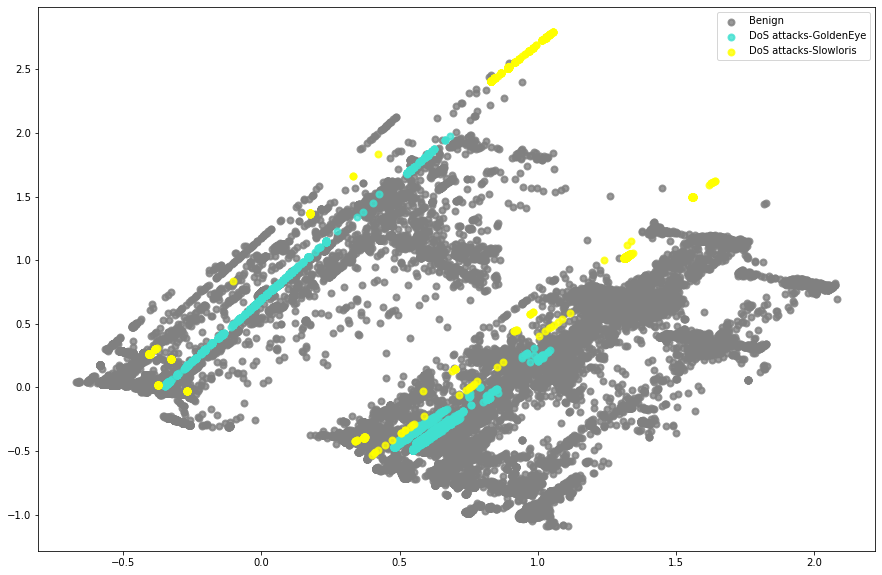

In [74]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Label.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Label == l, 0],
                x_validate_pca_cont[y_validate.Label == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

18.105556964874268 0.06781792640686035


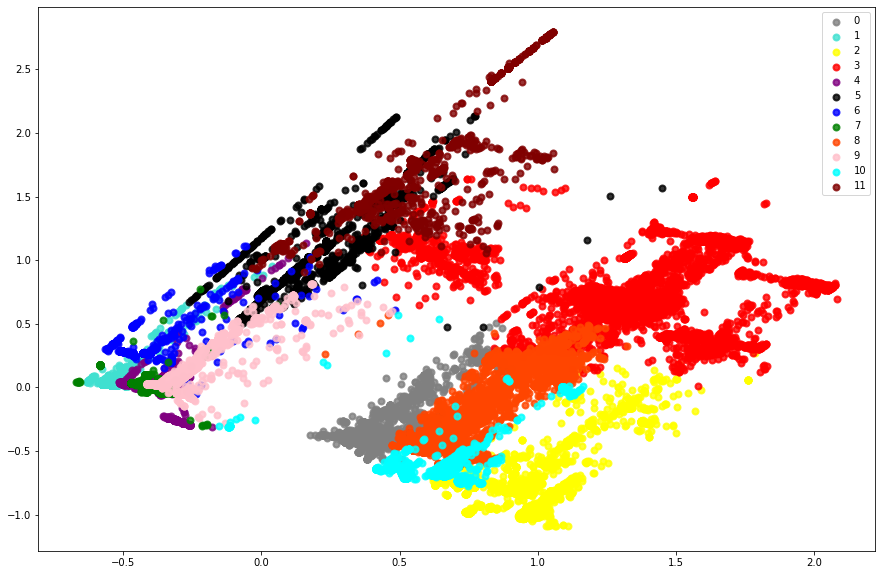

Predicted,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
Benign,27835,68442,10688,13561,9743,8841,7519,13456,9632,17148,8806,1940
DoS attacks-GoldenEye,1534,0,0,11,0,632,0,0,3798,2326,0,0
DoS attacks-Slowloris,471,0,0,954,12,0,197,0,0,22,0,542


In [75]:
#fit
start = time.time()
kmeans = KMeans(n_clusters = 12, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# plot pca graph
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

# cross tabulate to show actual groupings & clusters predicted
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Label})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

### Labled Grouped:

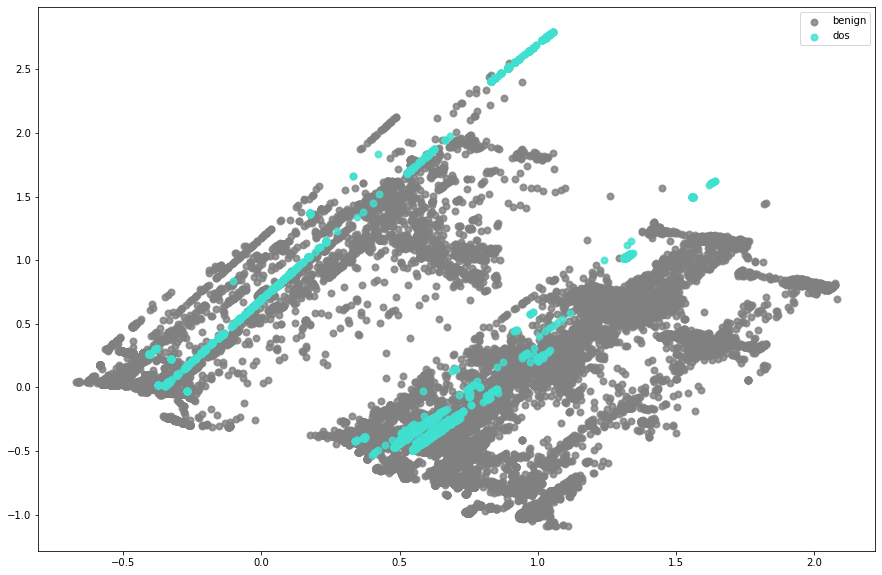

In [76]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Label_Category.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Label_Category == l, 0],
                x_validate_pca_cont[y_validate.Label_Category == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

10.87988543510437 0.06582331657409668


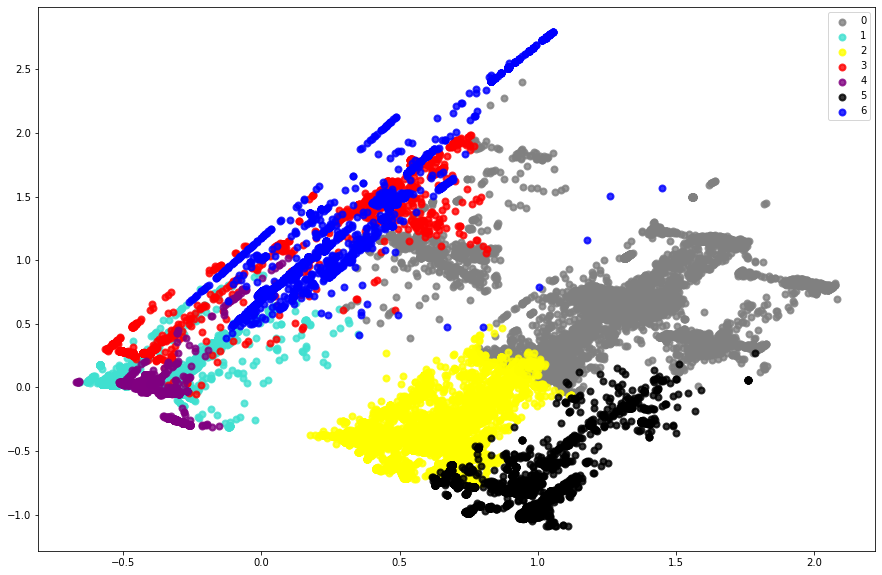

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
benign,16107,85443,43792,9351,23308,10686,8924
dos,989,2334,5779,197,12,0,1188


In [77]:
# fit model
start = time.time()
kmeans = KMeans(n_clusters = 7, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# apply pca to see the clustering visually
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

# crosstabulate
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Label_Category})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

### Binary Labels

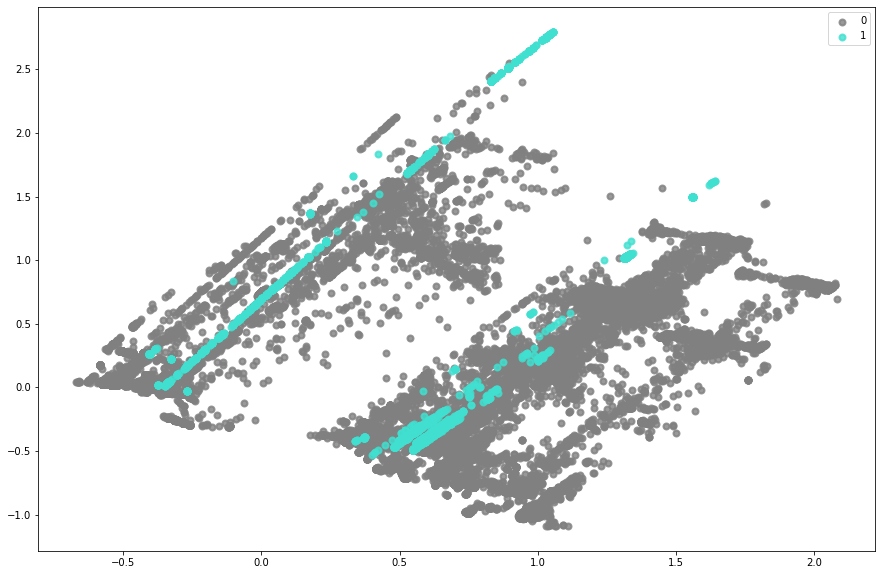

In [78]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_validate.Attack.unique()):
    plt.scatter(x_validate_pca_cont[y_validate.Attack == l, 0],
                x_validate_pca_cont[y_validate.Attack == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

4.187639951705933 0.06781721115112305


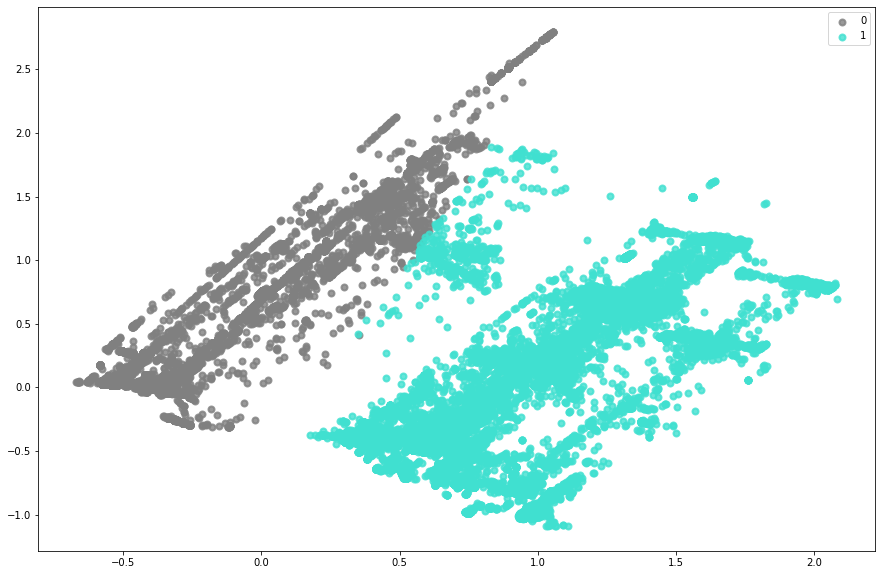

Predicted,0,1
Actual,,
0,127290,70321
1,3731,6768


In [79]:
# fit
start = time.time()
kmeans = KMeans(n_clusters = 2, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = kmeans.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# plot pca
x_validate_pca_cont = pca.fit_transform(x_validate)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

# cross tab
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_validate.Attack})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

## 6. Random Forest 

Due to the success of decision tree, try ensemble method - random forest

In [80]:
classifier =  RandomForestClassifier()

### All labels

In [81]:
#fit
start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_1 = pd.crosstab(y_validate.Label, y_predicted)
confusion_rf_1

104.11481094360352 2.057638168334961


col_0,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris
Label,,,
Benign,197611,0,0
DoS attacks-GoldenEye,0,8291,10
DoS attacks-Slowloris,25,0,2173


In [82]:
precision, recall, fscore, support = score(y_validate.Label, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999874,1.000000,0.999937
1,DoS GoldenEye,1.000000,0.998795,0.999397
2,DoS slowloris,0.995419,0.988626,0.992011


In [83]:
precision_rf_1, recall_rf_1, fscore_rf_1, n = score(y_validate.Label, y_predicted, average = 'macro')
accuracy_rf_1 = accuracy_score(y_validate.Label, y_predicted)

### Grouped Labels

In [84]:
# fit
start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_2 = pd.crosstab(y_validate.Label_Category, y_predicted)
confusion_rf_2

98.11925840377808 1.8936057090759277


col_0,benign,dos
Label_Category,,
benign,197611,0
dos,22,10477


In [85]:
precision, recall, fscore, support = score(y_validate.Label_Category, y_predicted)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999889,1.000000,0.999944
1,dos,1.000000,0.997905,0.998951


In [86]:
precision_rf_2, recall_rf_2, fscore_rf_2, n = score(y_validate.Label_Category, y_predicted, average = 'macro')
accuracy_rf_2 = accuracy_score(y_validate.Label_Category, y_predicted)

### Binary Labels

In [87]:
# fit
start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf_3 = pd.crosstab(y_validate.Attack, y_predicted)
confusion_rf_3

97.81947064399719 1.855071783065796


col_0,0,1
Attack,,
0,197611,0
1,23,10476


In [88]:
precision, recall, fscore, support = score(y_validate.Attack, y_predicted)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999884,1.000000,0.999942
1,1,1.000000,0.997809,0.998903


In [89]:
precision_rf_3, recall_rf_3, fscore_rf_3, n = score(y_validate.Attack, y_predicted, average = 'macro')
accuracy_rf_3 = accuracy_score(y_validate.Attack, y_predicted)

### Random forest results

In [90]:
print('Random Forrest: Precision / Recall / FScore / Accuracy')
print('All labels:', precision_rf_1, recall_rf_1, fscore_rf_1, accuracy_rf_1)
print('Grouped labels:', precision_rf_2, recall_rf_2, fscore_rf_2, accuracy_rf_2)
print('Binary labels:', precision_rf_3, recall_rf_3, fscore_rf_3,accuracy_rf_3)

Random Forrest: Precision / Recall / FScore / Accuracy
All labels: 0.9984308842628589 0.9958071165074082 0.997115001573078 0.9998318197107299
Grouped labels: 0.9999443412790374 0.9989522811696352 0.9994477602422784 0.999894286675316
Binary labels: 0.9999418116316019 0.9989046575864369 0.9994226323706734 0.999889481524194


# Final Label Grouping:

In [92]:
# proposed final grouping of labels
attack_group = {'Benign': 'benign',
                'DoS Hulk': 'dos',
                'PortScan': 'probe',
                'DDoS': 'ddos',
                'DoS attacks-GoldenEye': 'dos',
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force',
                'DoS attacks-Slowloris': 'dos',
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack',
                'XSS': 'web_attack'}

attacks = np.array(['Benign', 'DoS'])

# add new column to y of the mapping of labels
y_train['New_Label'] = y_train.Label.map(lambda x: attack_group[x])
y_test['New_Label'] = y_test.Label.map(lambda x: attack_group[x])
y_validate['New_Label'] = y_validate.Label.map(lambda x: attack_group[x])

d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
d:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# Optimising

Find the number of estimators value we should use

In [94]:
# n estimators is the number of decision trees we consider in the ensemble 
n_estimators = [12, 25, 50, 100, 200, 400, 800, 1600]
results = []
time_results = []

In [95]:
# note: takes a long time
for estimator in n_estimators: 
    # fit model with n_estimators parameter
    classifier =  RandomForestClassifier(n_estimators=estimator)
    classifier.fit(x_train, y_train.New_Label)
    
    # predict validation
    start = time.time()
    y_pred = classifier.predict(x_validate)
    end = time.time()
    
    # calculate metrics
    p, r, f1, n = score(y_validate.New_Label, y_pred, average = 'macro')
    
    # append f1 and time to results array
    results.append(f1)
    time_results.append(end-start)
    

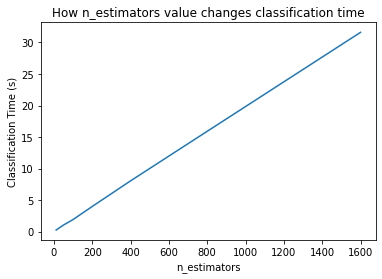

In [96]:
# plot classification time for n_estimators
plt.plot(n_estimators, time_results)
plt.xlabel('n_estimators')
plt.ylabel('Classification Time (s)')
plt.title('How n_estimators value changes classification time')
plt.savefig('n_estimators-time.png')

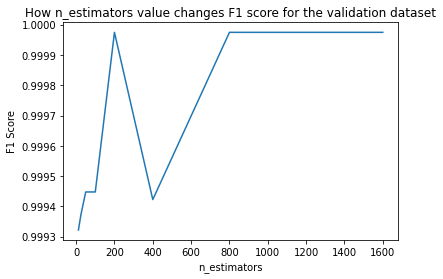

In [97]:
# plot f1 score for n estimators
plt.plot(n_estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('How n_estimators value changes F1 score for the validation dataset')
plt.savefig('n_estimators.png')

Although n_estimators=800 was highest, that many number of estimators is not realistic in terms of classificaiton times. We go with the second peak - n_estimators = 25

In [98]:
from sklearn.model_selection import RandomizedSearchCV

max_features = [int(x) for x in np.linspace(2, 40, num = 20)] # from 2 to 40 (max number) of features (up in 2s)
max_features.append('auto') 
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)] # 10 values for max depth from 10 to 200
max_depth.append(None) # also have option for no max depth
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': [25], # chosen n_estimator
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [99]:
# Use the random grid to search for best hyperparameters

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train['New_Label'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200,
                                                      None],
                                        'max_features': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25]},
                   random_state=42, verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 10,
 'max_depth': 157,
 'bootstrap': True}

Test our validation dataset, on the new labels, with these parameters

In [101]:
classifier =  RandomForestClassifier(n_estimators=25, 
                                     max_depth=200, 
                                     min_samples_split=5, 
                                     min_samples_leaf=1, 
                                     max_features=20, 
                                     bootstrap=True
)
# fit 
start = time.time()
classifier.fit(x_train, y_train.New_Label)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_validate)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

confusion_rf = pd.crosstab(y_validate.New_Label, y_predicted)
confusion_rf

51.34473443031311 0.4387929439544678


col_0,benign,dos
New_Label,,
benign,197611,0
dos,0,10499


In [102]:
precision, recall, fscore, support = score(y_validate.New_Label, y_predicted)
d = {'attack': attacks, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,1.0,1.0,1.0
1,DoS,1.0,1.0,1.0


In [103]:
precision, recall, fscore, n = score(y_validate.New_Label, y_predicted, average = 'macro')
accuracy = accuracy_score(y_validate.New_Label, y_predicted)
precision, recall, fscore, accuracy

(1.0, 1.0, 1.0, 1.0)

Very good results. Fingers crossed this works just as well on the hold out dataset...

# Final

Peform random forest, using the new attack groupings and parameters, on the dataset held out for testing

In [104]:
# chosen hyperparameters
classifier =  RandomForestClassifier(n_estimators=25, 
                                     max_depth=200, 
                                     min_samples_split=5, 
                                     min_samples_leaf=1, 
                                     max_features=20, 
                                     bootstrap=True
)

In [105]:
# fit
start = time.time()
classifier.fit(x_train, y_train.New_Label)
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = classifier.predict(x_test)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# metrics
confusion = pd.crosstab(y_test.New_Label, y_predicted)
precision, recall, fscore, n = score(y_test.New_Label, y_predicted, average = 'macro')
accuracy = accuracy_score(y_test.New_Label, y_predicted)

47.67003607749939 0.5226051807403564


In [106]:
confusion

col_0,benign,dos
New_Label,,
benign,197610,0
dos,1,10499


In [107]:
precision, recall, fscore, accuracy

(0.9999974697764801, 0.9999523809523809, 0.9999749242273885, 0.999995194848878)

Text(0.5, 1.0, 'Confusion Matrix for Final Results')

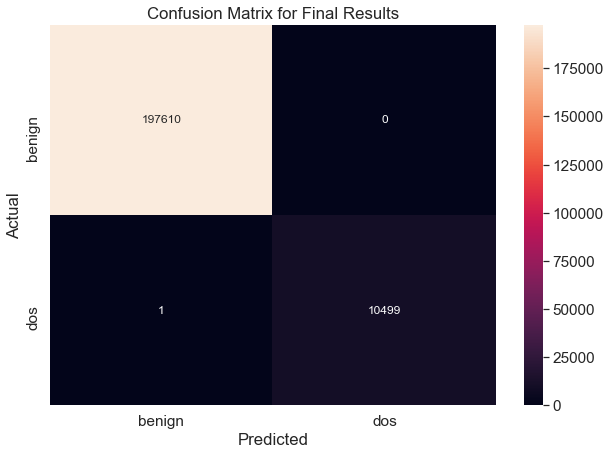

In [108]:
# plot heat map confusion matrix
plt.figure(figsize = (10,7))
seaborn.set(font_scale=1.4)
ax = seaborn.heatmap(confusion, annot=True, annot_kws={"size": 12}, fmt='g')
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Final Results')

In [109]:
precision, recall, fscore, support = score(y_test.New_Label, y_predicted)
d = {'attack': attacks, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,Benign,0.999995,1.000000,0.999997
1,DoS,1.000000,0.999905,0.999952


% of the training dataset each label took

In [110]:
y_train['New_Label'].value_counts()/len(y_train)*100

benign    94.954735
dos        5.045265
Name: New_Label, dtype: float64